In [1]:
import zipfile
import os
import pandas as pd

In [6]:
# Path to the zip file
zip_file_path = '.\Dataset-zip\PRAICP-1004-RainfallTS.zip'

# Path to the dataset folder
dataset_folder = '.\Dataset-org'

# Create the dataset folder if it doesn't exist
os.makedirs(dataset_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)

print(f"Data extracted to {dataset_folder}")

Data extracted to .\Dataset-org


In [14]:
# Load datasets
df_highest_monthly_total = pd.read_csv('Dataset-org/Data/rainfall-monthly-highest-daily-total.csv')
df_rainy_days = pd.read_csv('Dataset-org/Data/rainfall-monthly-number-of-rain-days.csv')
df_total_rainfall = pd.read_csv('Dataset-org/Data/rainfall-monthly-total.csv')

# Merge datasets on 'month'
df_combined = pd.merge(df_highest_monthly_total, df_rainy_days, on='month')
df_combined = pd.merge(df_combined, df_total_rainfall, on='month')

# Convert 'month' column to datetime if not already
df_combined['month'] = pd.to_datetime(df_combined['month'], format='%Y-%m')

# Format the 'month' column to display only Year and Month (YYYY-MM) as a string
df_combined['month'] = df_combined['month'].dt.strftime('%Y-%m')

# Display the combined dataframe to verify the result
print(df_combined)

       month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0    1982-01                       36.5                10           107.1
1    1982-02                        9.4                 5            27.8
2    1982-03                       61.7                11           160.8
3    1982-04                       45.1                14           157.0
4    1982-05                       33.0                10           102.2
..       ...                        ...               ...             ...
457  2020-02                       23.8                 8            65.0
458  2020-03                       47.4                 8           108.8
459  2020-04                       51.8                12           188.0
460  2020-05                       53.8                16           255.6
461  2020-06                       41.0                21           233.8

[462 rows x 4 columns]


In [16]:
df_combined.to_csv('Dataset-org/Data/df_combined.csv',index=False)

In [2]:
org_df=pd.read_csv('Dataset-org/Data/df_combined.csv')
org_df

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
0,1982-01,36.5,10,107.1
1,1982-02,9.4,5,27.8
2,1982-03,61.7,11,160.8
3,1982-04,45.1,14,157.0
4,1982-05,33.0,10,102.2
...,...,...,...,...
457,2020-02,23.8,8,65.0
458,2020-03,47.4,8,108.8
459,2020-04,51.8,12,188.0
460,2020-05,53.8,16,255.6


In [6]:
# Check for missing values
print('null values')
print('------------------------------')
print(org_df.isnull().sum())
print('------------------------------')
print()

# Descriptive statistics
print('Descriptive statistics')
print('------------------------------------------------------------------')
print(org_df.describe())
print('------------------------------------------------------------------')
print()

# Check the time range of the data
print('month range')
print('---------------')
print(org_df['month'].min(), org_df['month'].max())
print('---------------')

null values
------------------------------
month                        0
maximum_rainfall_in_a_day    0
no_of_rainy_days             0
total_rainfall               0
dtype: int64
------------------------------

Descriptive statistics
------------------------------------------------------------------
       maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
count                 462.000000        462.000000      462.000000
mean                   52.358225         13.958874      176.236580
std                    35.685122          4.947494      113.296793
min                     0.200000          1.000000        0.200000
25%                    30.625000         11.000000       89.025000
50%                    43.450000         14.000000      158.450000
75%                    63.150000         18.000000      237.950000
max                   216.200000         27.000000      765.900000
------------------------------------------------------------------

month range
---------------

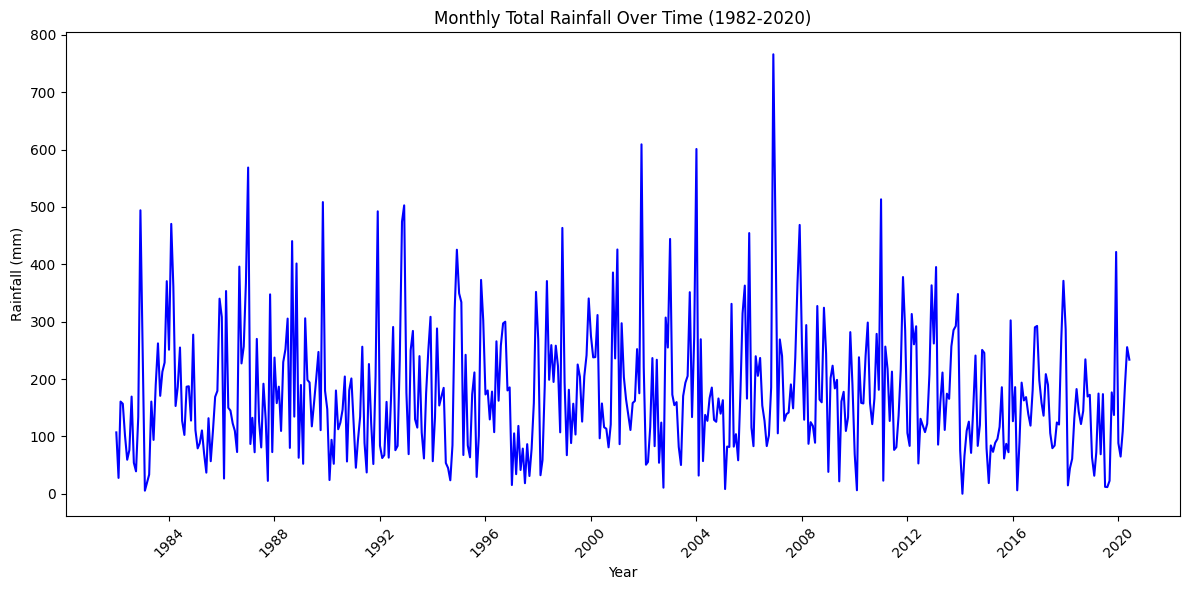

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'month' column to a datetime object (if not already done)
org_df['month'] = pd.to_datetime(org_df['month'])

# Set up the plot size to fit horizontally
plt.figure(figsize=(12, 6))  

# Plot the data
plt.plot(org_df['month'], org_df['total_rainfall'], label='Total Rainfall', color='blue')
plt.title('Monthly Total Rainfall Over Time ({}-{})'.format(org_df['month'].min().year, org_df['month'].max().year))
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

# Format the x-axis to show labels every 4 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))  # Locator for every 4 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format labels to show the year only

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout so labels do not overlap and fit into the plot area
plt.tight_layout()

# Display the plot
plt.show()

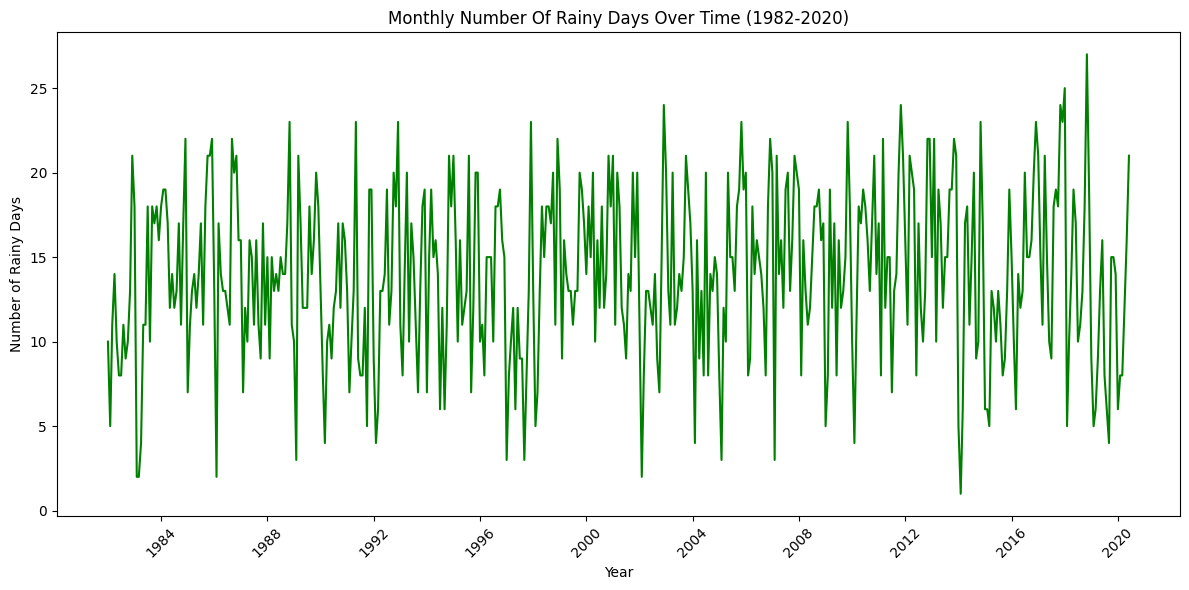

In [14]:
# Set up the plot size to fit horizontally
plt.figure(figsize=(12, 6))  

# Plot the data
plt.plot(org_df['month'], org_df['no_of_rainy_days'], label='no_of_rainy_days', color='green')
plt.title('Monthly Number Of Rainy Days Over Time ({}-{})'.format(org_df['month'].min().year, org_df['month'].max().year))
plt.xlabel('Year')
plt.ylabel('Number of Rainy Days')

# Format the x-axis to show labels every 4 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))  # Locator for every 4 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format labels to show the year only

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout so labels do not overlap and fit into the plot area
plt.tight_layout()

# Display the plot
plt.show()

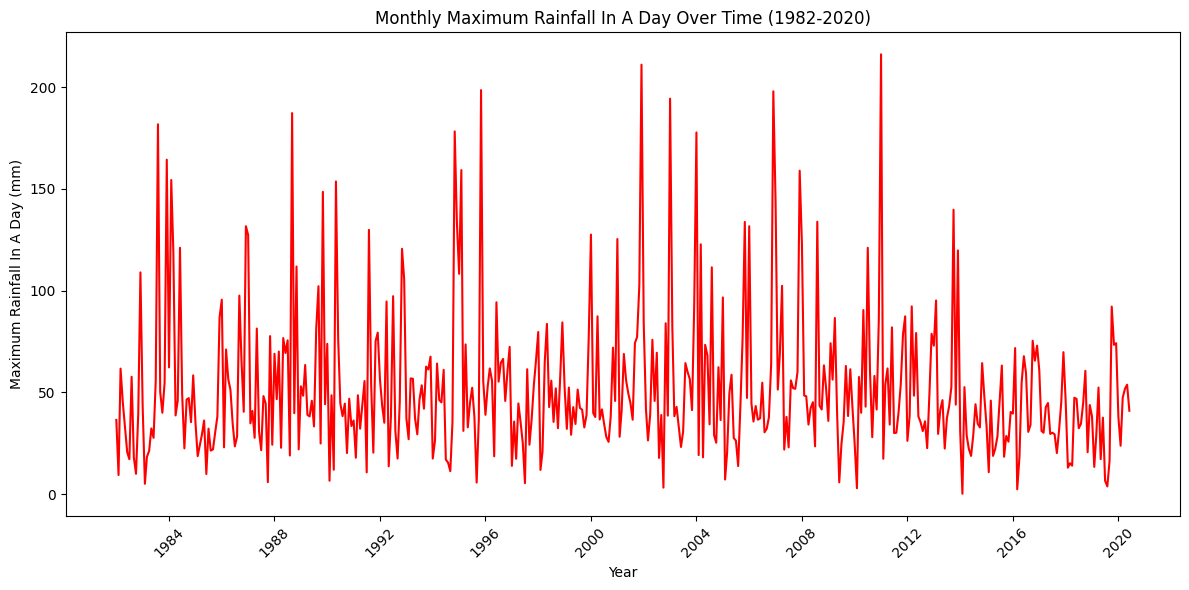

In [16]:
# Set up the plot size to fit horizontally
plt.figure(figsize=(12, 6))  

# Plot the data
plt.plot(org_df['month'], org_df['maximum_rainfall_in_a_day'], label='maximum_rainfall_in_a_day ', color='red')
plt.title('Monthly Maximum Rainfall In A Day Over Time ({}-{})'.format(org_df['month'].min().year, org_df['month'].max().year))
plt.xlabel('Year')
plt.ylabel('Maximum Rainfall In A Day (mm)')

# Format the x-axis to show labels every 4 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))  # Locator for every 4 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format labels to show the year only

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout so labels do not overlap and fit into the plot area
plt.tight_layout()

# Display the plot
plt.show()